In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# Read data
in_dir = 'data/curves/'
X = np.loadtxt(in_dir + 'hand_noisy.txt')

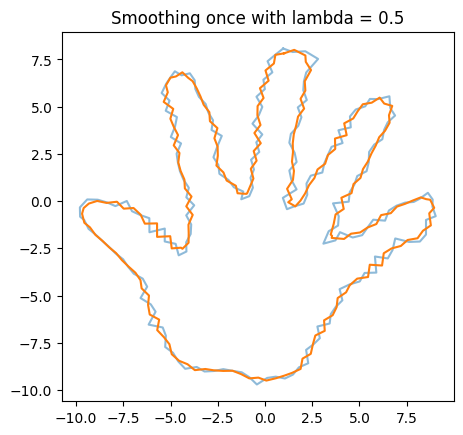

In [2]:
# Make circulant smoothing matrix
l = np.zeros(X.shape[0])
l[[-1, 0, 1]] = [1, -2, 1]
L = scipy.linalg.circulant(l)

# Smoothing parameter
lmb = 0.5

# Smooth the curve
X1 = (np.eye(X.shape[0]) + lmb * L) @ X

# Plot the results - use indexing to plot closed curve
idx = np.arange(X.shape[0] + 1)
idx[-1] = 0
fig, ax = plt.subplots()
ax.plot(X[idx, 0], X[idx, 1], alpha=0.5)
ax.plot(X1[idx, 0], X1[idx, 1])
ax.set_aspect('equal')
ax.set_title(f'Smoothing once with lambda = {lmb}')
plt.show()

 Explicit smoothing works only for small λ (try for example a value 1.5 in the cell above).  To achieve more aggressive smoothing, we need to smooth iteratively.  This requires setting two parameters: λ and the number of iterations.

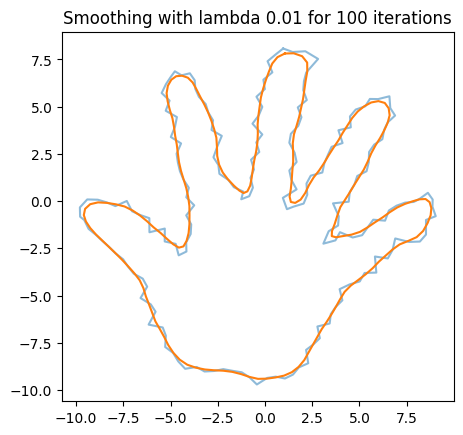

In [3]:
# Smoothing parameters
n_iter = 100
lmb = 0.01  

# Smooth the curve
Xn = X.copy()
for i in range(n_iter):
    Xn = (np.eye(X.shape[0]) + lmb * L) @ Xn

# Show the results
fig, ax = plt.subplots()
ax.plot(X[idx, 0], X[idx, 1], alpha=0.5) 
ax.plot(Xn[idx, 0], Xn[idx, 1])
ax.set_aspect('equal')
ax.set_title(f'Smoothing with lambda {lmb} for {n_iter} iterations')
plt.show()

Let's visualize every iteration using ipwidgets.

In [4]:
from ipywidgets import interact

n_iter = 100
lmb = 0.5  

X_iters = [X]
for i in range(n_iter):
    X_iters.append((np.eye(X.shape[0]) + lmb * L) @ X_iters[-1])

def show_iter(i):
    plt.plot(X[idx, 0], X[idx, 1], alpha=0.5) 
    plt.plot(X_iters[i][idx, 0], X_iters[i][idx, 1])
    plt.title(f'Smoothing with lambda {lmb} iter {i}')
    plt.gca().set_aspect('equal')
    plt.show()

interact(show_iter, i=(0, n_iter, 1));

interactive(children=(IntSlider(value=50, description='i'), Output()), _dom_classes=('widget-interact',))

In [5]:
 interactive(children=(IntSlider(value=50, description='i'), Output()), _dom_classes=('widget-interact',))

NameError: name 'interactive' is not defined